In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

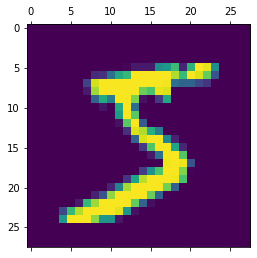

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
x_test_flattened.shape

(10000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (28*28,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 536us/step - loss: 0.7300 - accuracy: 0.8060
Epoch 2/5
1875/1875 [==============================] - 1s 508us/step - loss: 0.3134 - accuracy: 0.9119
Epoch 3/5
1875/1875 [==============================] - 1s 521us/step - loss: 0.2839 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 1s 502us/step - loss: 0.2749 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 1s 502us/step - loss: 0.2697 - accuracy: 0.9243


In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 439us/step - loss: 0.2669 - accuracy: 0.9253


[0.26687467098236084, 0.9253000020980835]

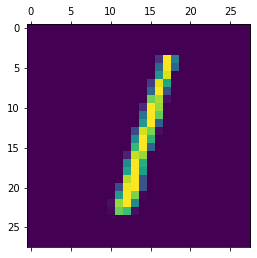

In [17]:
plt.matshow(x_test[2])

In [18]:
y_predicted = model.predict(x_test_flattened)
y_predicted[2]

array([4.0411949e-04, 9.9419630e-01, 7.1675086e-01, 3.3192861e-01,
       3.5145670e-02, 1.2788549e-01, 1.9465512e-01, 1.8594784e-01,
       3.9992943e-01, 4.6764851e-02], dtype=float32)

In [19]:
np.argmax(y_predicted[2])

1

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

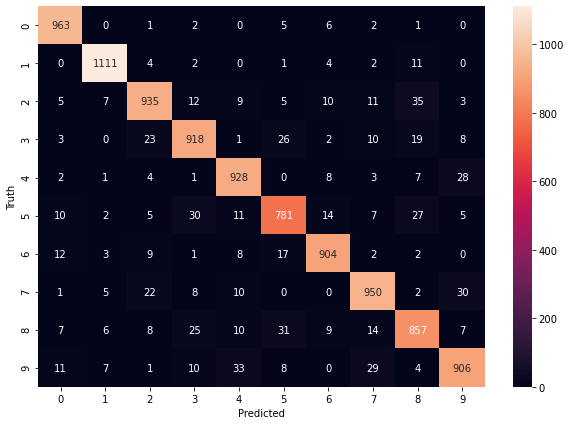

In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')


])


model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 724us/step - loss: 0.4572 - accuracy: 0.8727
Epoch 2/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.1278 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 1s 705us/step - loss: 0.0836 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 1s 712us/step - loss: 0.0629 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 1s 710us/step - loss: 0.0493 - accuracy: 0.9851


In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 538us/step - loss: 0.0774 - accuracy: 0.9770


[0.07741107791662216, 0.9769999980926514]

Text(69.0, 0.5, 'Truth')

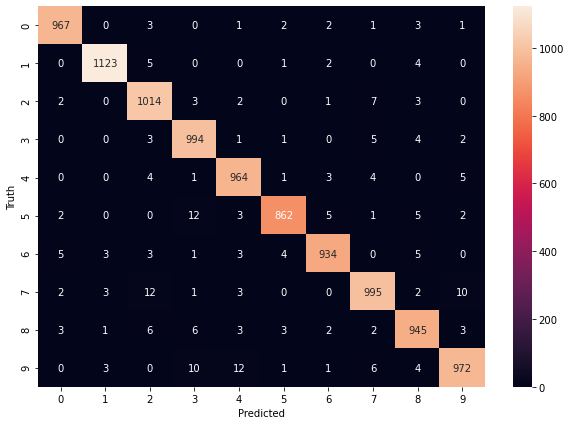

In [24]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

See different types of optimizers, loss, metrics, activation fn etc.

In [42]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
    
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [44]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 691us/step - loss: 0.0337 - accuracy: 0.9892
Epoch 2/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.0269 - accuracy: 0.9917
Epoch 3/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.0228 - accuracy: 0.9929
Epoch 4/5
1875/1875 [==============================] - 1s 676us/step - loss: 0.0181 - accuracy: 0.9946
Epoch 5/5
1875/1875 [==============================] - 1s 680us/step - loss: 0.0155 - accuracy: 0.9949


In [45]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 542us/step - loss: 0.0770 - accuracy: 0.9788


[0.07704181224107742, 0.9787999987602234]

In [53]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred_class = [np.argmax(i) for i in y_pred]

In [56]:
y_pred_class[:5]

[7, 2, 1, 0, 4]

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

